In [1]:
import matplotlib.pyplot as plt
import pandas as pd

#### 1909 sends/second, 400 mailboxes, 2000 telegraphs

In [30]:
# number of mailboxes: 400
# number of telegraphs: 2000
# maximum delay: 300
# maximum subscription: 8
# duration: 20
# number of telegrams sent: 1967

df = pd.read_csv('cmake-build-debug/output.csv', skiprows=6)
df.describe()

,unexpected delay(ms),subscriber delay(ms)
count,38197.0,38197.000000
mean,0.0,155.958217
std,0.0,82.264591
min,0.0,16.000000
25%,0.0,84.000000
50%,0.0,155.000000
75%,0.0,226.000000
max,0.0,300.000000


#### More messages, 2881 sends/sec

In [31]:
# number of mailboxes: 400
# number of telegraphs: 2000
# maximum delay: 300
# maximum subscription: 8
# duration: 20
# number of telegrams sent: 2879

df = pd.read_csv('cmake-build-debug/output.csv', skiprows=6)
df.describe()

,unexpected delay(ms),subscriber delay(ms)
count,57629.000000,57629.000000
mean,0.001996,158.227108
std,0.067783,82.084485
min,0.000000,16.000000
25%,0.000000,87.000000
50%,0.000000,159.000000
75%,0.000000,228.000000
max,4.000000,300.000000


**10 mailboxes, 10213 telegrams sent 9.3 million times in 20 seconds**
- max latency increased to 82ms
- lots of "hot" mailboxes - each mailbox handles ~1000 telegrams & ~1 million sends
- 466,264 sends per secnod

In [55]:
# number of mailboxes: 10
# number of telegraphs: 2000
# maximum delay: 300
# maximum subscription: 10
# duration: 20
# number of telegrams sent: 10213

df = pd.read_csv('cmake-build-debug/output.csv', skiprows=6)
df.describe()

,latency,delay
count,9.325288e+06,9.325288e+06
mean,2.090225e-01,1.578521e+02
std,2.639950e+00,8.255550e+01
min,0.000000e+00,1.600000e+01
25%,0.000000e+00,8.600000e+01
50%,0.000000e+00,1.560000e+02
75%,0.000000e+00,2.300000e+02
max,8.200000e+01,3.000000e+02


In [56]:
# 0.3% of sends have latency longer than a frame
len(df[df['latency'] >= 16])/len(df)

0.0031869257013831635

#### 42197 sends per second, 10 mailboxes

In [46]:
# number of mailboxes: 10
# number of telegraphs: 2000
# maximum delay: 300
# maximum subscription: 5
# duration: 20
# number of telegrams sent: 1872

df2 = pd.read_csv('cmake-build-debug/output2.csv', skiprows=6)
df2.describe()

,latency,delay
count,843959.000000,843959.000000
mean,0.005930,157.447189
std,0.145974,82.461040
min,0.000000,16.000000
25%,0.000000,85.000000
50%,0.000000,157.000000
75%,0.000000,229.000000
max,10.000000,300.000000


In [51]:
len(df2[df2['latency'] >= 8])/len(df2)

8.17575261357483e-05

#### 10281 sends per second,  5 mailboxes, 200k sends, 248 unique telegrams

In [53]:
# number of mailboxes: 5
# number of telegraphs: 2000
# maximum delay: 300
# maximum subscription: 5
# duration: 20
# number of telegrams sent: 248

df3 = pd.read_csv('cmake-build-debug/output3.csv', skiprows=6)
df3.describe()

,latency,delay
count,205634.000000,205634.000000
mean,0.001313,156.683146
std,0.051038,82.701294
min,0.000000,16.000000
25%,0.000000,84.000000
50%,0.000000,157.000000
75%,0.000000,229.000000
max,4.000000,300.000000


#### 15239 sends/second, increase # of telegraphs to 4000, shorten duration to 5 seconds, only 51 unique telegrams

In [57]:
# number of mailboxes: 5
# number of telegraphs: 4000
# maximum delay: 1000
# maximum subscription: 5
# duration: 5
# number of telegrams sent: 51

df4 = pd.read_csv('cmake-build-debug/output4.csv', skiprows=6)
df4.describe()

,latency,delay
count,76195.0,76195.000000
mean,0.0,490.280215
std,0.0,285.683928
min,0.0,16.000000
25%,0.0,238.000000
50%,0.0,482.000000
75%,0.0,735.000000
max,0.0,1000.000000


#### increase number of telegrams to 551 and sends to 829k in 5 seconds

In [58]:
# number of mailboxes: 5
# number of telegraphs: 4000
# maximum delay: 1000
# maximum subscription: 5
# duration: 5
# number of telegrams sent: 551

df5 = pd.read_csv('cmake-build-debug/output5.csv', skiprows=6)
df5.describe()

,latency,delay
count,829136.000000,829136.000000
mean,0.014917,488.844519
std,0.195561,283.848776
min,0.000000,16.000000
25%,0.000000,239.000000
50%,0.000000,478.000000
75%,0.000000,730.000000
max,12.000000,1000.000000


Increasing mailboxes to 1000 increases max and avg. latency

In [59]:
# number of mailboxes: 1000
# number of telegraphs: 4000
# maximum delay: 1000
# maximum subscription: 10
# duration: 10
# number of telegrams sent: 298

df6 = pd.read_csv('cmake-build-debug/output6.csv', skiprows=6)
df6.describe()

,latency,delay
count,5593.000000,5593.000000
mean,0.179153,495.908278
std,2.435817,284.512465
min,0.000000,16.000000
25%,0.000000,247.000000
50%,0.000000,493.000000
75%,0.000000,740.000000
max,52.000000,1000.000000


In [61]:
# 0.4% of sends have latency longer than a frame
len(df6[df6['latency'] >= 16])/len(df6)

0.004291078133381012

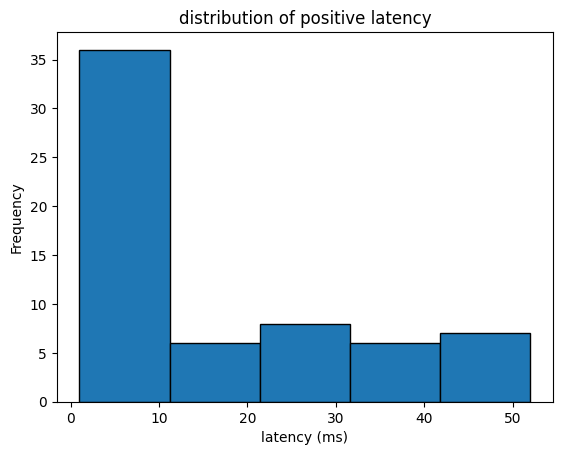

In [67]:
# Plot histogram using pandas
df6[df6['latency'] > 0]['latency'].plot(kind='hist', bins=5, edgecolor='black')

# Add labels and title
plt.xlabel('latency (ms)')
plt.ylabel('Frequency')
plt.title('distribution of positive latency')

# Show the plot
plt.show()

In [68]:
# number of mailboxes: 1000
# number of telegraphs: 4000
# maximum delay: 1000
# maximum subscription: 10
# duration: 10
# number of telegrams sent: 298

df7 = pd.read_csv('cmake-build-debug/output7.csv', skiprows=6)
df7.describe()

,latency,delay
count,5711.000000,5711.00000
mean,0.009631,500.75661
std,0.230157,283.43408
min,0.000000,16.00000
25%,0.000000,250.00000
50%,0.000000,502.00000
75%,0.000000,742.00000
max,13.000000,1000.00000


In [69]:
df8 = pd.read_csv('cmake-build-debug/output8.csv', skiprows=6)
df8.describe()

,latency,delay
count,5894.000000,5894.000000
mean,0.005599,504.302172
std,0.125499,285.554744
min,0.000000,16.000000
25%,0.000000,253.000000
50%,0.000000,501.000000
75%,0.000000,753.750000
max,5.000000,1000.000000


In [71]:
df10 = pd.read_csv('cmake-build-debug/output10.csv', skiprows=6)
df10.describe()

,latency,delay
count,16351.000000,16351.000000
mean,0.005015,57.838725
std,0.122059,24.552631
min,0.000000,16.000000
25%,0.000000,37.000000
50%,0.000000,58.000000
75%,0.000000,79.000000
max,5.000000,100.000000


In [75]:
len(df10[df10['latency'] > 0])/len(df10)

0.0025074918965200905

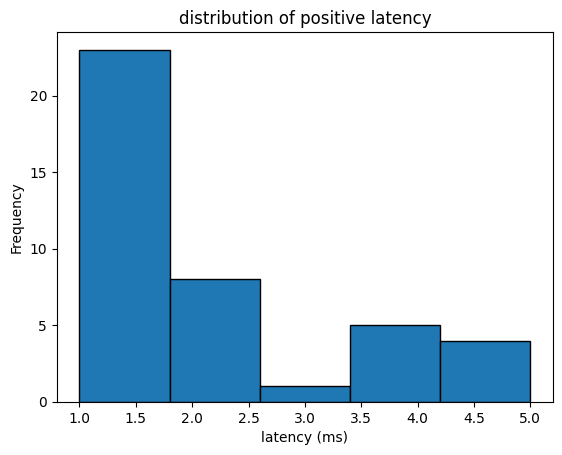

In [80]:
# Plot histogram using pandas
df10[df10['latency'] > 0]['latency'].plot(kind='hist', bins=5, edgecolor='black')

# Add labels and title
plt.xlabel('latency (ms)')
plt.ylabel('Frequency')
plt.title('distribution of positive latency')

# Show the plot
plt.show()

In [3]:
# number of mailboxes: 500
# number of telegraphs: 2000
# maximum delay: 500
# maximum subscription: 100
# duration: 10
# number of telegrams sent: 220
# number of unsubscriptions: 32

df = pd.read_csv('cmake-build-debug/exp16.csv', skiprows=7)
df.describe()

,latency,delay
count,43370.000000,43370.000000
mean,132.389901,254.492529
std,78.332148,139.866727
min,0.000000,16.000000
25%,65.000000,134.000000
50%,132.000000,253.000000
75%,198.000000,376.000000
max,1174.000000,500.000000


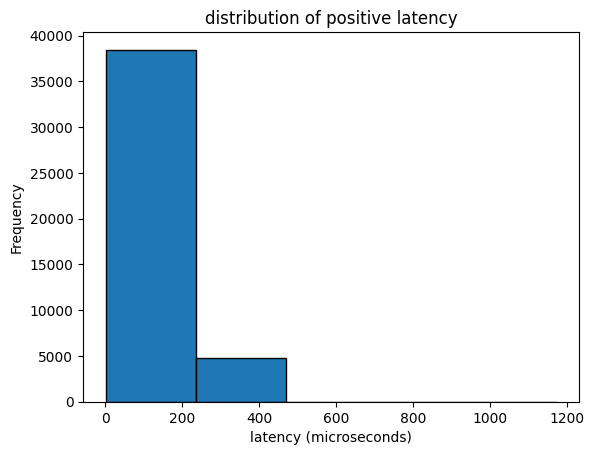

In [5]:
# Plot histogram using pandas
df[df['latency'] > 0]['latency'].plot(kind='hist', bins=5, edgecolor='black')

# Add labels and title
plt.xlabel('latency (microseconds)')
plt.ylabel('Frequency')
plt.title('distribution of positive latency')

# Show the plot
plt.show()